# Evaluación de los diferentes modelos

1. Autoregression (AR)
2. Moving Average (MA)
3. Autoregressive Moving Average (ARMA)
4. Autoregressive Integrated Moving Average (ARIMA)
5. Seasonal Autoregressive Integrated Moving-Average (SARIMA)
6. Seasonal Autoregressive Integrated Moving-Average with Exogenous Regressors (SARIMAX)
7. Vector Autoregression (VAR)
8. Vector Autoregression Moving-Average (VARMA)
9. Vector Autoregression Moving-Average with Exogenous Regressors (VARMAX)
10. Simple Exponential Smoothing (SES)
11. Holt Winter’s Exponential Smoothing (HWES)

# 0- Proceso genérico

## Importación de las librerías generales

In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

%matplotlib inline

import numpy as np
import pandas as pd
import scipy
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import math
#import statsmodels.graphics.tsaplots as sgt
#import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARIMA

from statsmodels.tsa.statespace.sarimax import SARIMAX
!pip install pmdarima
from pmdarima.arima import auto_arima
!pip install arch
from arch import arch_model
import warnings
warnings.filterwarnings("ignore")
sns.set()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 5.1 MB/s 
     |████████████████████████████████| 9.8 MB 48.0 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 903 kB 5.0 MB/s 


## Carga de los datos


In [2]:
df = pd.read_csv('./BTCUSDT1h-18.8.17-31-7-22.csv', index_col=0, parse_dates=True)
del df['ignore'] #eliminamos la función ignore
del df['open_time'] #eliminamos la función open_time
del df['close_time'] #eliminamos la función close_time

In [3]:
df.head()

,open,high,low,close,volume,qav,num_trades,taker_base_vol,taker_quote_vol
Date,,,,,,,,,
2017-08-18 00:59:59.999,4285.08,4340.62,4228.76,4286.53,82.435474,353504.410409,268,70.703594,303212.284309
2017-08-18 01:59:59.999,4269.36,4269.36,4134.61,4243.59,75.684883,318327.529415,243,45.573568,192407.488931
2017-08-18 02:59:59.999,4251.95,4298.64,4234.00,4267.59,54.071337,230478.628087,219,46.316836,197398.076557
2017-08-18 03:59:59.999,4244.77,4308.70,4234.00,4292.39,64.001349,273495.006480,306,52.061572,222560.204200
2017-08-18 04:59:59.999,4292.39,4292.39,4234.43,4287.92,50.797515,216512.633035,267,45.826187,195365.989365


## Definición de las variables

In [4]:
n_obs=math.floor(72)
freq='h'

## Definir la frequencia y completar los valores faltantes producidos por la introducción de la frequencia

In [5]:
df=df.asfreq(freq)
df=df.fillna(method='ffill')
df.isnull().sum()

open               0
high               0
low                0
close              0
volume             0
qav                0
num_trades         0
taker_base_vol     0
taker_quote_vol    0
dtype: int64

## Revisión de valores NULL o NAN

In [6]:
nan_rows = df[df.isnull().any(1)]
nan_rows


,open,high,low,close,volume,qav,num_trades,taker_base_vol,taker_quote_vol
Date,,,,,,,,,


## Visualización del Dataset (multivariante)

In [7]:
df.head()

,open,high,low,close,volume,qav,num_trades,taker_base_vol,taker_quote_vol
Date,,,,,,,,,
2017-08-18 00:59:59.999,4285.08,4340.62,4228.76,4286.53,82.435474,353504.410409,268.0,70.703594,303212.284309
2017-08-18 01:59:59.999,4269.36,4269.36,4134.61,4243.59,75.684883,318327.529415,243.0,45.573568,192407.488931
2017-08-18 02:59:59.999,4251.95,4298.64,4234.00,4267.59,54.071337,230478.628087,219.0,46.316836,197398.076557
2017-08-18 03:59:59.999,4244.77,4308.70,4234.00,4292.39,64.001349,273495.006480,306.0,52.061572,222560.204200
2017-08-18 04:59:59.999,4292.39,4292.39,4234.43,4287.92,50.797515,216512.633035,267.0,45.826187,195365.989365


##Creación de los datos de test y de los datos de entrenamiento (multivariante)

Para la evaluación de los modelos se va a optar por una proporcion de 80/20 entre datos de entrenamiento y test respectivamente.

In [8]:
# Contabilizar la posición del ultmo 20% de los datos
#n_obs=math.floor(len(df)*0.2)
# Definimos los datos de Train y Test en función de la posición del 20% de los datos

df_train, df_test = df[0:-n_obs], df[-n_obs:]
print(df.shape ,df_train.shape, df_test.shape)
df_train.head()

(43393, 9) (43321, 9) (72, 9)


,open,high,low,close,volume,qav,num_trades,taker_base_vol,taker_quote_vol
Date,,,,,,,,,
2017-08-18 00:59:59.999,4285.08,4340.62,4228.76,4286.53,82.435474,353504.410409,268.0,70.703594,303212.284309
2017-08-18 01:59:59.999,4269.36,4269.36,4134.61,4243.59,75.684883,318327.529415,243.0,45.573568,192407.488931
2017-08-18 02:59:59.999,4251.95,4298.64,4234.00,4267.59,54.071337,230478.628087,219.0,46.316836,197398.076557
2017-08-18 03:59:59.999,4244.77,4308.70,4234.00,4292.39,64.001349,273495.006480,306.0,52.061572,222560.204200
2017-08-18 04:59:59.999,4292.39,4292.39,4234.43,4287.92,50.797515,216512.633035,267.0,45.826187,195365.989365


## Creación del dataset (uni variable)

Debido a que ciertos modelos solo permiten una sola serie temporal se ha apostado por la variable "close" para realizar el análisis

In [9]:
df1 = df.drop(['open', 'high','low', 'volume', 'qav','num_trades', 'taker_base_vol','taker_quote_vol'], axis=1)

In [10]:
df1.head()


,close
Date,
2017-08-18 00:59:59.999,4286.53
2017-08-18 01:59:59.999,4243.59
2017-08-18 02:59:59.999,4267.59
2017-08-18 03:59:59.999,4292.39
2017-08-18 04:59:59.999,4287.92


##Creación de los datos de test y de los datos de entrenamiento (univariable)

Para la evaluación de los modelos se va a optar por una proporcion de 80/20 entre datos de entrenamiento y test respectivamente.

In [11]:
# Contabilizar la posición del ultmo 20% de los datos
#n_obs=math.floor(len(df)*0.2)
# Definimos los datos de Train y Test en función de la posición del 20% de los datos


df1_train, df1_test = df1[0:-n_obs], df1[-n_obs:]
print(df1.shape ,df1_train.shape, df1_test.shape)


(43393, 1) (43321, 1) (72, 1)


## Creación del Dataset de variables Exogenas

In [12]:
dfex = df.drop(['close'], axis=1)
dfex.head()

,open,high,low,volume,qav,num_trades,taker_base_vol,taker_quote_vol
Date,,,,,,,,
2017-08-18 00:59:59.999,4285.08,4340.62,4228.76,82.435474,353504.410409,268.0,70.703594,303212.284309
2017-08-18 01:59:59.999,4269.36,4269.36,4134.61,75.684883,318327.529415,243.0,45.573568,192407.488931
2017-08-18 02:59:59.999,4251.95,4298.64,4234.00,54.071337,230478.628087,219.0,46.316836,197398.076557
2017-08-18 03:59:59.999,4244.77,4308.70,4234.00,64.001349,273495.006480,306.0,52.061572,222560.204200
2017-08-18 04:59:59.999,4292.39,4292.39,4234.43,50.797515,216512.633035,267.0,45.826187,195365.989365


##Creación de los datos de test y de los datos de entrenamiento de las variables exogenas

Para la evaluación de los modelos se va a optar por una proporcion de 80/20 entre datos de entrenamiento y test respectivamente.

In [13]:
dfex_train, dfex_test = dfex[0:-n_obs], dfex[-n_obs:]
print(dfex.shape ,dfex_train.shape, dfex_test.shape)

(43393, 8) (43321, 8) (72, 8)


## Definción de la función para presentar datos

In [14]:
warnings.simplefilter('ignore')

def show_graph(df1,df2,title):
    data = pd.concat([df1, df2])
    data.reset_index(inplace=True, drop=True)
    data=data.iloc[43200:]

    for col in data.columns:
        if col.lower().startswith('pred'):
            data[col].plot(label=col,linestyle="dotted")
        else:
            data[col].plot(label=col)

    plt.rcParams["figure.figsize"] = (20, 10)
    plt.title(title)
    plt.legend()
    plt.show()
    print ()
    print('Evaluated model:', title)
    print('Mean absolute error:', mean_absolute_error(df2['close'].values,df2['Pred'].values))
    print('Root mean squared error:', np.sqrt(mean_squared_error(df2['close'].values,df2['Pred'].values)))

In [15]:
warnings.simplefilter('ignore')
from sklearn.metrics import mean_absolute_error, mean_squared_error

def show_graphp1(data,title):
    #data = pd.concat([df1, df2])
    data.reset_index(inplace=True, drop=True)
    #data=data.iloc[43200:]

    for col in data.columns:
        if col.lower().startswith('predicted_mean'):
            data[col].plot(label=col,linestyle="dotted")
        else:
            data[col].plot(label=col)

    plt.rcParams["figure.figsize"] = (20, 10)
    plt.title(title)
    plt.legend()
    plt.show()


# Modelos

## 1. Autoregression (AR)
The autoregression (AR) method models the next step in the sequence as a linear function of the observations at prior time steps.<br>

The notation for the model involves specifying the order of the model p as a parameter to the AR function, e.g. AR(p). For example, AR(1) is a first-order autoregression model.<br>

The method is suitable for univariate time series without trend and seasonal components.<br>

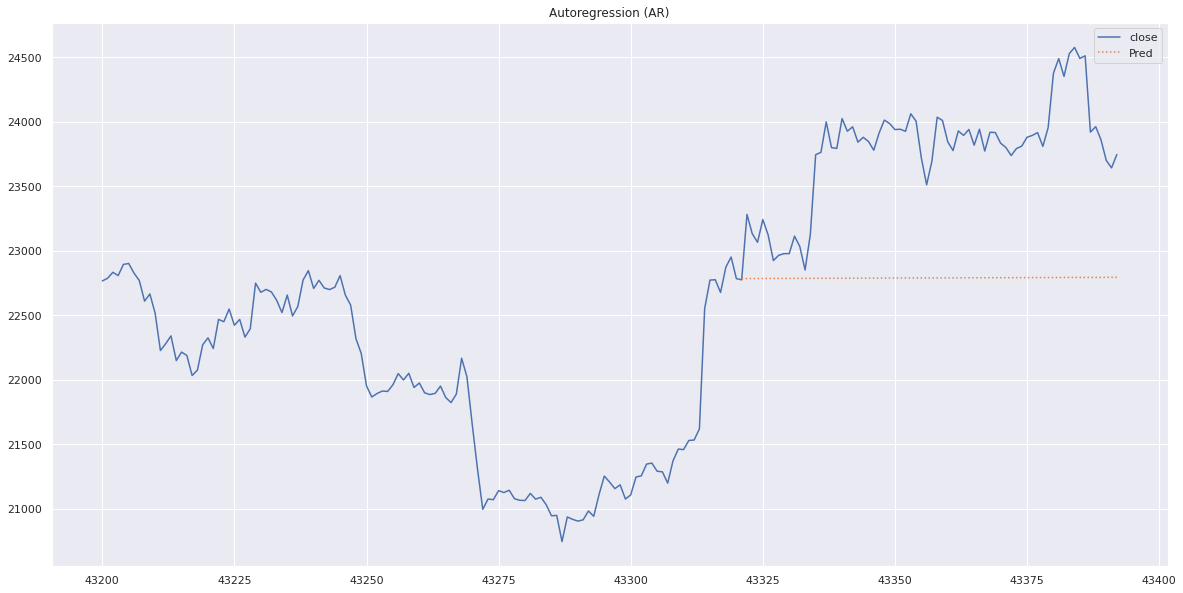


Evaluated model: Autoregression (AR)
Mean absolute error: 975.3966719545738
Root mean squared error: 1058.192831673178


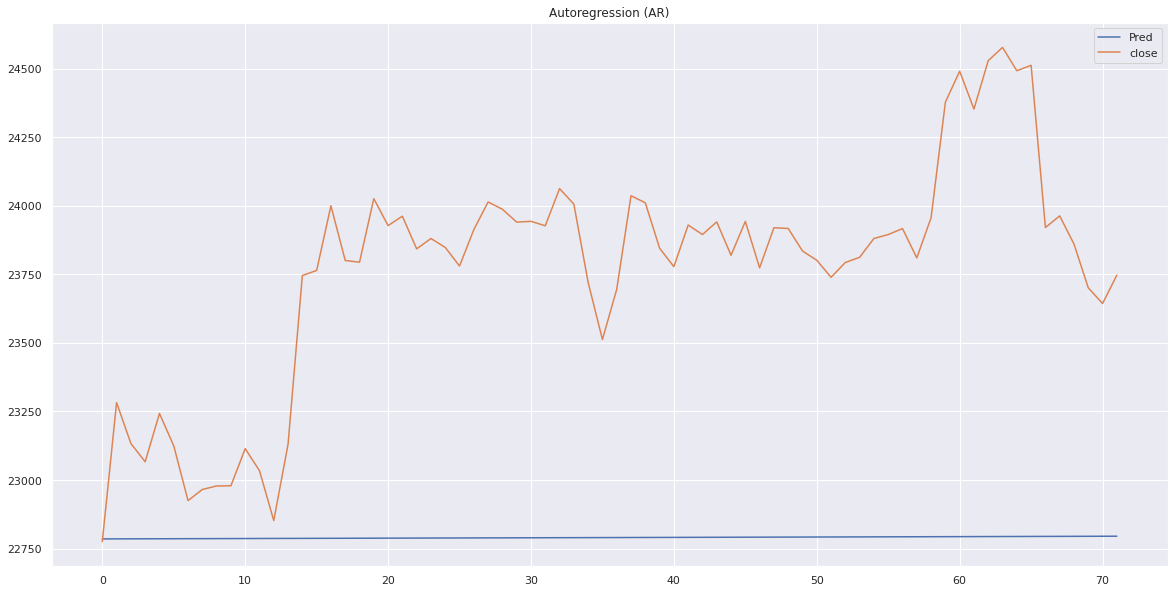

In [ ]:
from statsmodels.tsa.ar_model import AutoReg

def AR_model(train,test):
    # fit model
    model = AutoReg(train['close'], lags=1)
    model_fit = model.fit()
    # make prediction
    yhat=model_fit.predict(len(train), len(train) + len(test) - 1)
    res=pd.DataFrame({"Pred":yhat, "close":test["close"].values})
    return res
 
df_ret = AR_model(df1_train, df_test)
show_graph(df1_train, df_ret, "Autoregression (AR)")
show_graphp1( df_ret, "Autoregression (AR)")

## 2. Moving Average (MA)
The moving average (MA) method models the next step in the sequence as a linear function of the residual errors from a mean process at prior time steps.<br>

A moving average model is different from calculating the moving average of the time series.<br>

The notation for the model involves specifying the order of the model q as a parameter to the MA function, e.g. MA(q). For example, MA(1) is a first-order moving average model.<br>

The method is suitable for univariate time series without trend and seasonal components.<br>

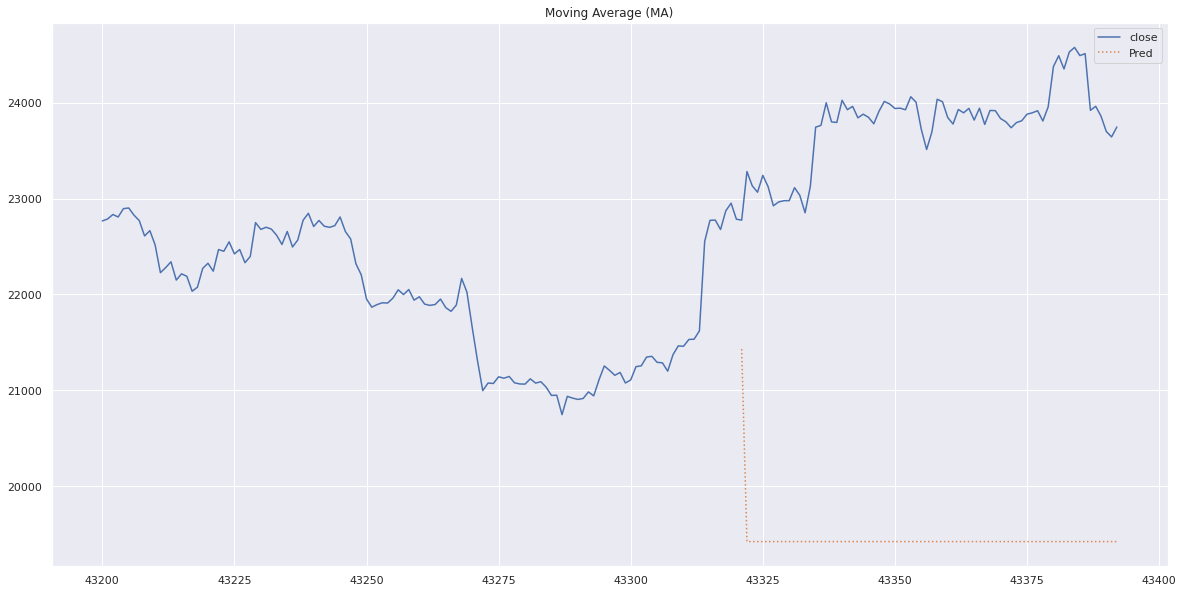


Evaluated model: Moving Average (MA)
Mean absolute error: 4314.922597319921
Root mean squared error: 4347.364441646865


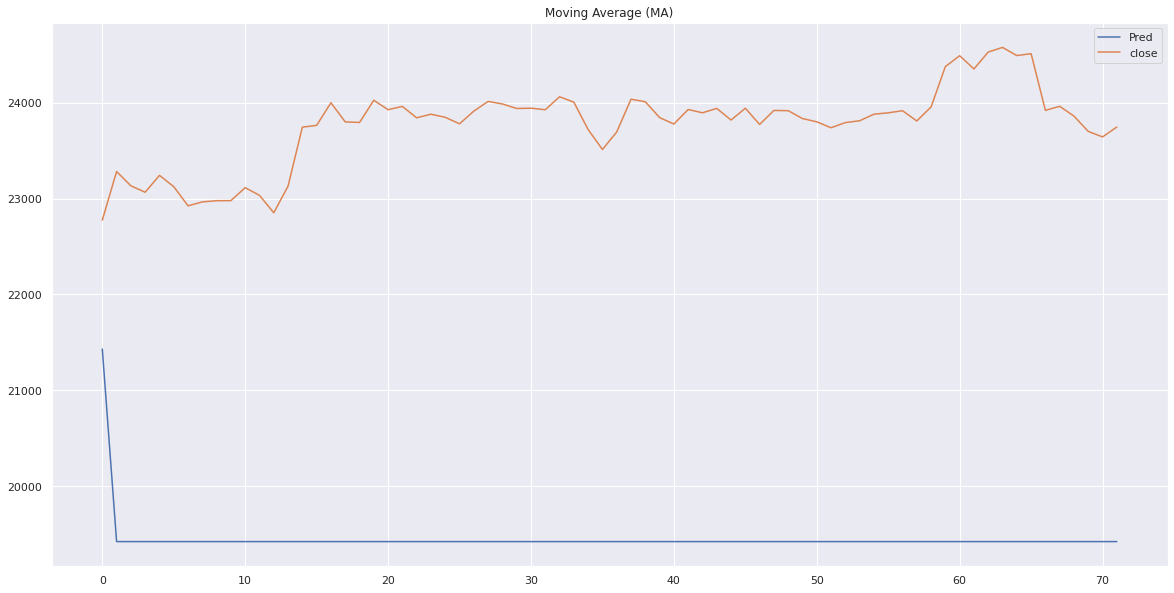

In [ ]:
from statsmodels.tsa.arima_model import ARMA


def MA_model(train,test):
    # fit model
    model = model = ARMA(train['close'], order=(0, 1))
    model_fit = model.fit(disp=True)
    # make prediction
    yhat = model_fit.predict(len(train), len(train) + len(test) - 1)
    res=pd.DataFrame({"Pred":yhat, "close":test["close"].values})
    return res

df_ret = MA_model(df1_train, df1_test)
show_graph(df1_train, df_ret, "Moving Average (MA)")

show_graphp1( df_ret, "Moving Average (MA)")

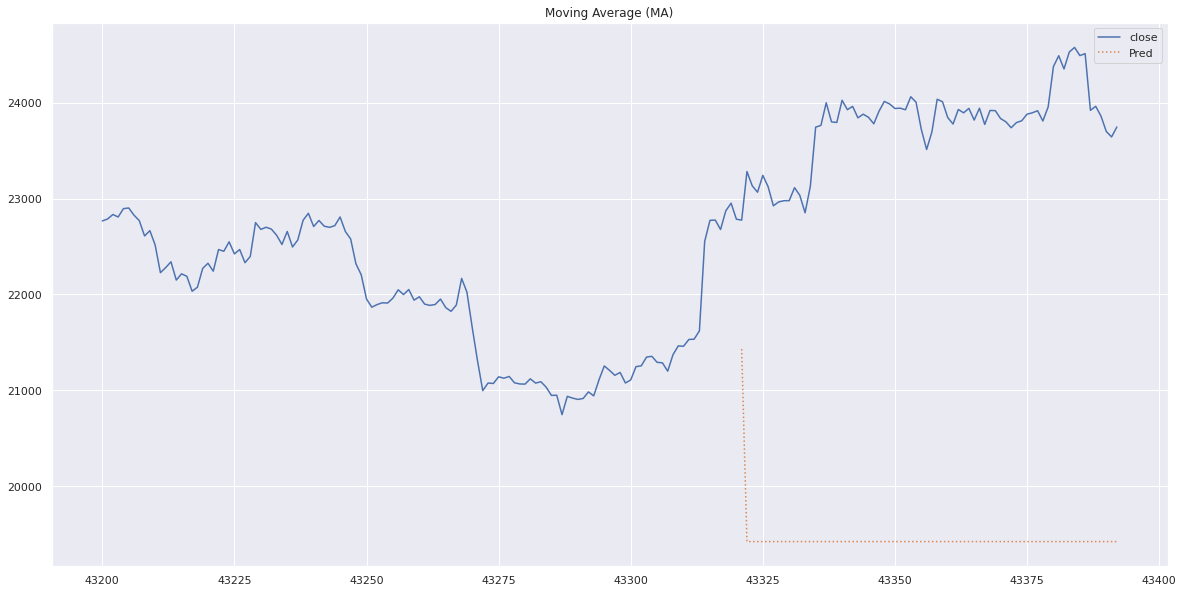


Evaluated model: Moving Average (MA)
Mean absolute error: 4314.922597319921
Root mean squared error: 4347.364441646865


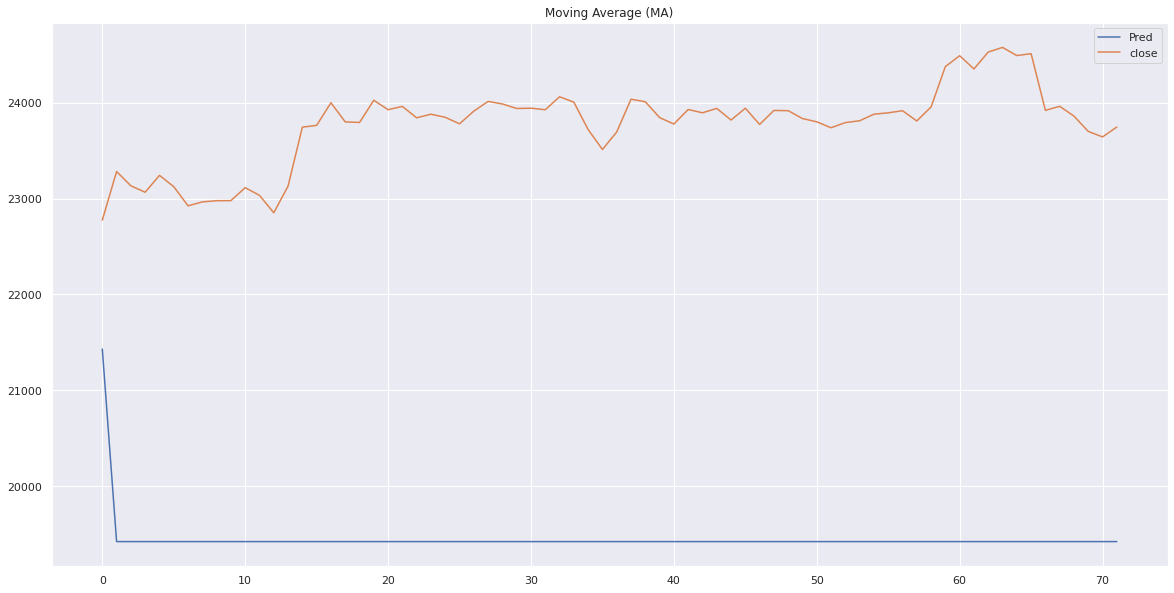

In [ ]:
from statsmodels.tsa.arima_model import ARIMA


def MA_model(train,test):
    # fit model
    model = model = ARIMA(train['close'], order=(0,0, 1))
    model_fit = model.fit(disp=True)
    # make prediction
    yhat = model_fit.predict(len(train), len(train) + len(test) - 1)
    res=pd.DataFrame({"Pred":yhat, "close":test["close"].values})
    return res

df_ret = MA_model(df1_train, df1_test)
show_graph(df1_train, df_ret, "Moving Average (MA)")
show_graphp1( df_ret, "Moving Average (MA)")

## 3. Autoregressive Moving Average (ARMA)
The Autoregressive Moving Average (ARMA) method models the next step in the sequence as a linear function of the observations and resiudal errors at prior time steps.<br>

It combines both Autoregression (AR) and Moving Average (MA) models.<br>

The notation for the model involves specifying the order for the AR(p) and MA(q) models as parameters to an ARMA function, e.g. ARMA(p, q). An ARIMA model can be used to develop AR or MA models.<br>

The method is suitable for univariate time series without trend and seasonal components.<br>

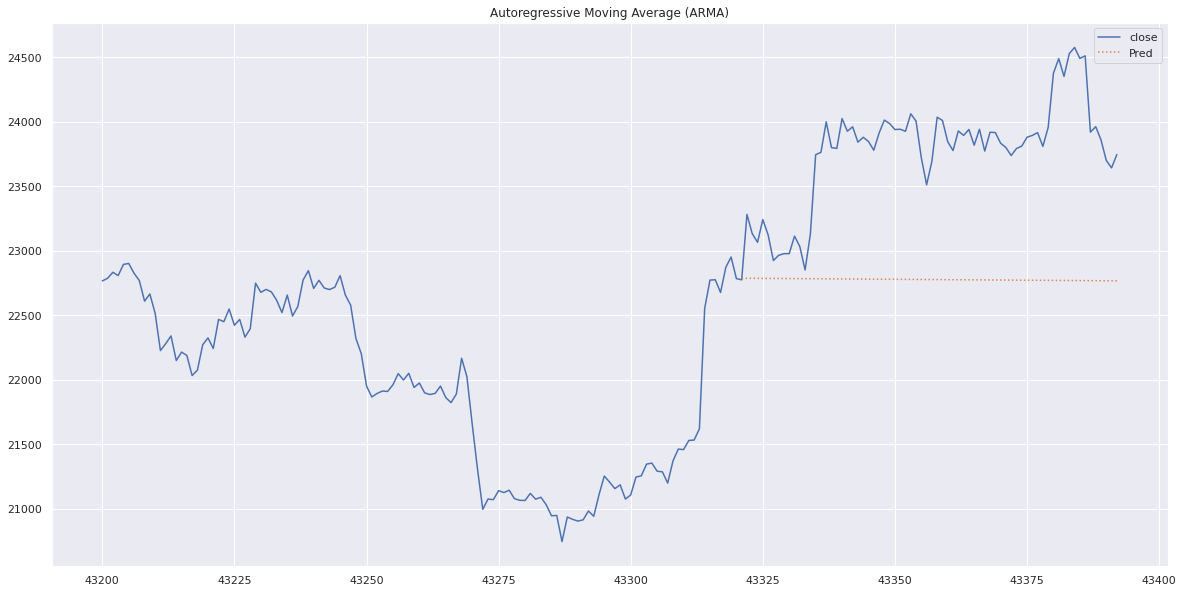


Evaluated model: Autoregressive Moving Average (ARMA)
Mean absolute error: 987.7977182425707
Root mean squared error: 1071.9614657867203


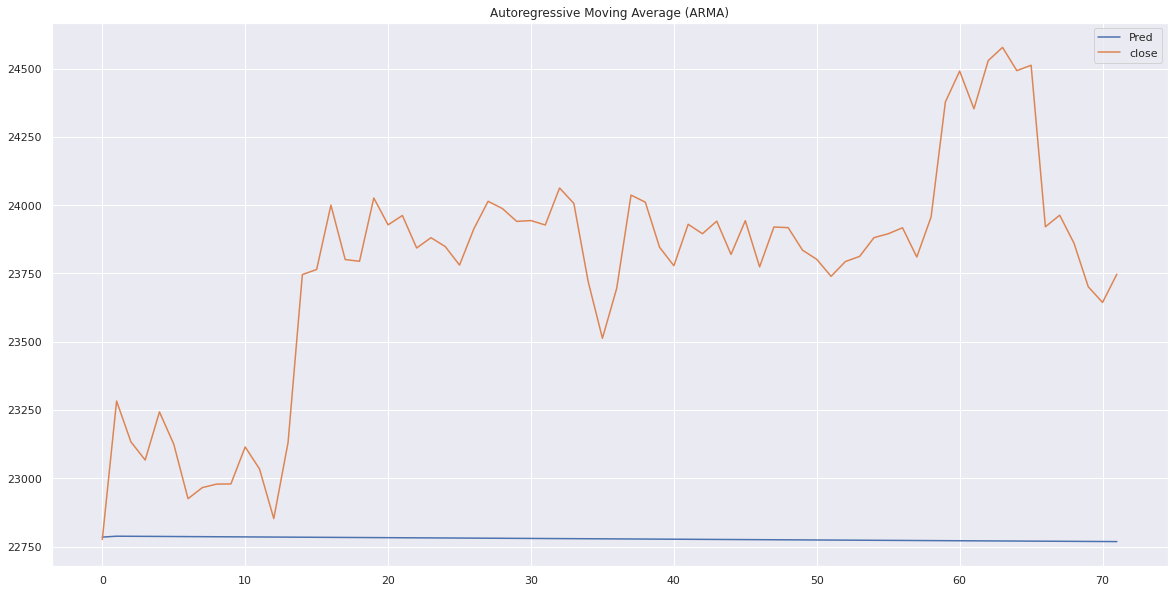

In [ ]:
from statsmodels.tsa.arima_model import ARMA


def ARMA_model(train,test):
    # fit model
    model = ARMA(train['close'], order=(1,2))
    model_fit = model.fit(disp=False)
    # make prediction
    yhat = model_fit.predict(len(train), len(train) + len(test) - 1)
    res=pd.DataFrame({"Pred":yhat, "close":test["close"].values})
    return res
 
df_ret = ARMA_model(df1_train, df_test)
show_graph(df1_train, df_ret, "Autoregressive Moving Average (ARMA)")
show_graphp1( df_ret,  "Autoregressive Moving Average (ARMA)")

## 4. Autoregressive Integrated Moving Average (ARIMA)


The Autoregressive Integrated Moving Average (ARIMA) method models the next step in the sequence as a linear function of the differenced observations and residual errors at prior time steps.<br>

It combines both Autoregression (AR) and Moving Average (MA) models as well as a differencing pre-processing step of the sequence to make the sequence stationary, called integration (I).<br>

The notation for the model involves specifying the order for the AR(p), I(d), and MA(q) models as parameters to an ARIMA function, e.g. ARIMA(p, d, q). An ARIMA model can also be used to develop AR, MA, and ARMA models.<br>

The method is suitable for univariate time series with trend and without seasonal components.<br>

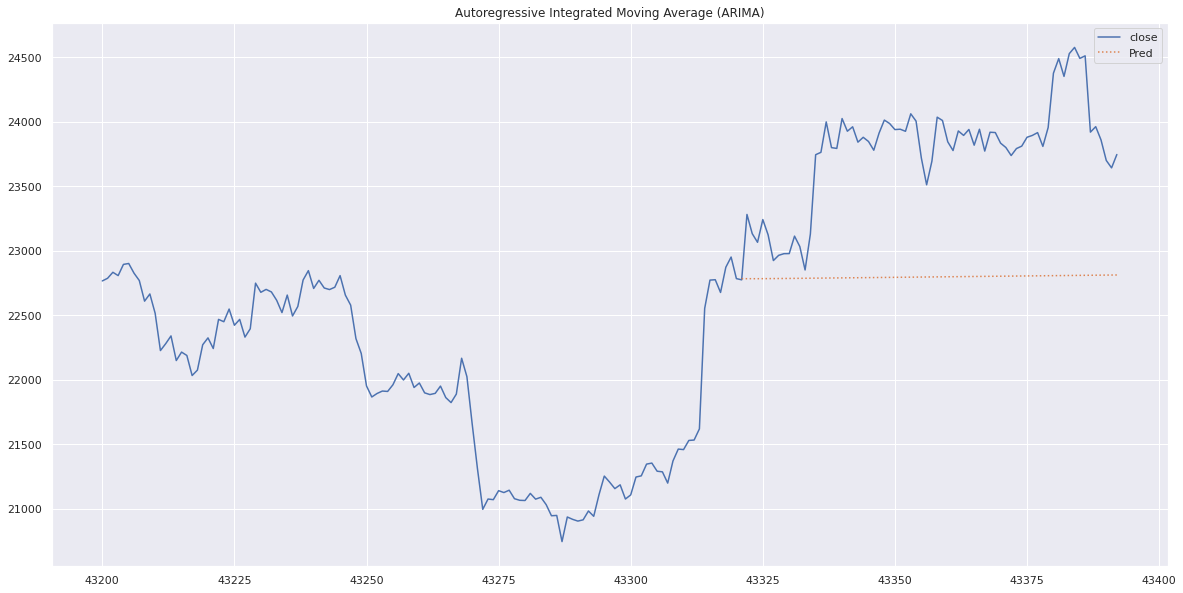


Evaluated model: Autoregressive Integrated Moving Average (ARIMA)
Mean absolute error: 967.7015048532462
Root mean squared error: 1049.5515089321057


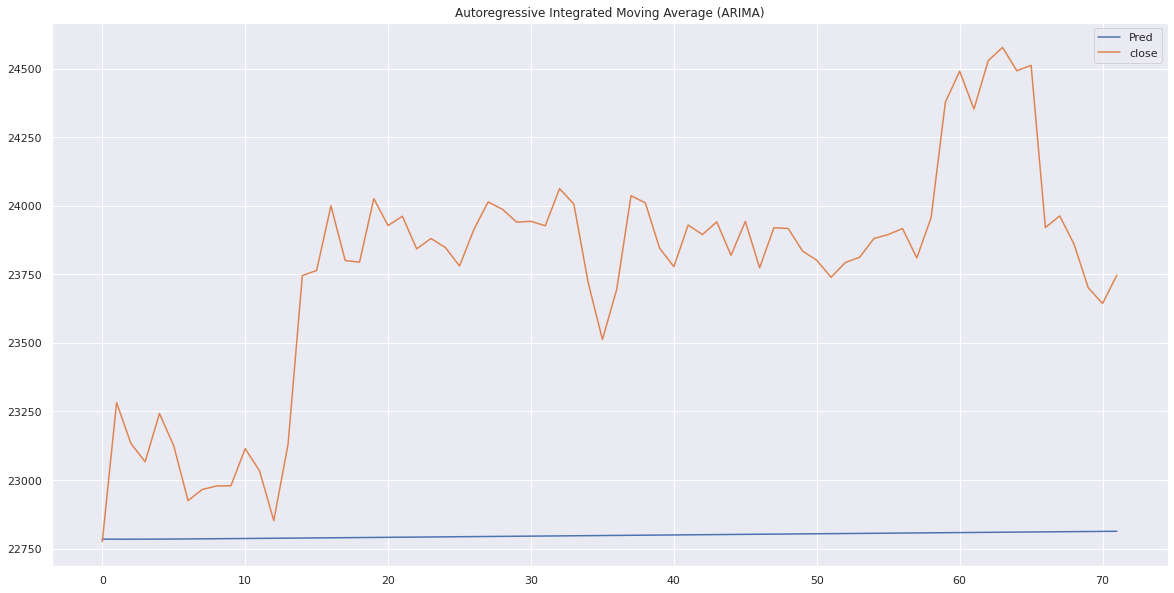

In [ ]:
from statsmodels.tsa.arima_model import ARIMA


def ARIMA_model(train,test):
    # fit model
    model = ARIMA(train['close'], order=(1, 1, 1))
    model_fit = model.fit(disp=False)
    # make prediction
    yhat = model_fit.predict(len(train), len(train) + len(test) - 1, typ='levels')
    res=pd.DataFrame({"Pred":yhat, "close":test["close"].values})
    return res

df_ret = ARIMA_model(df1_train, df_test)
show_graph(df1_train, df_ret, "Autoregressive Integrated Moving Average (ARIMA)")
show_graphp1( df_ret,  "Autoregressive Integrated Moving Average (ARIMA)")

### ARIMA (2,2,2)

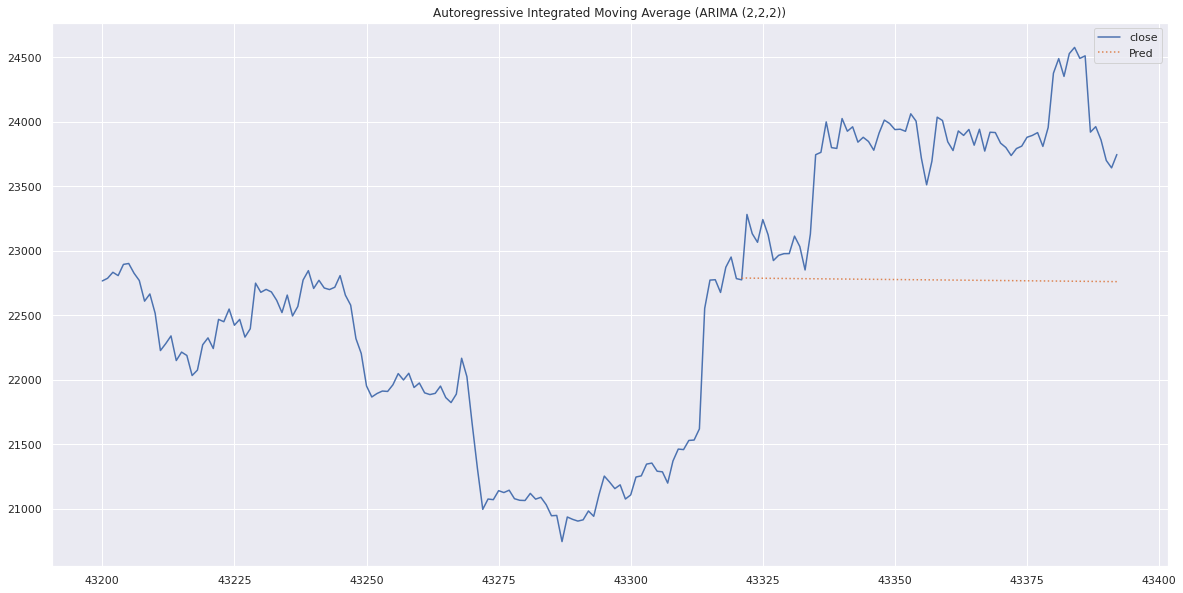


Evaluated model: Autoregressive Integrated Moving Average (ARIMA (2,2,2))
Mean absolute error: 990.2510004508299
Root mean squared error: 1074.7748873278736


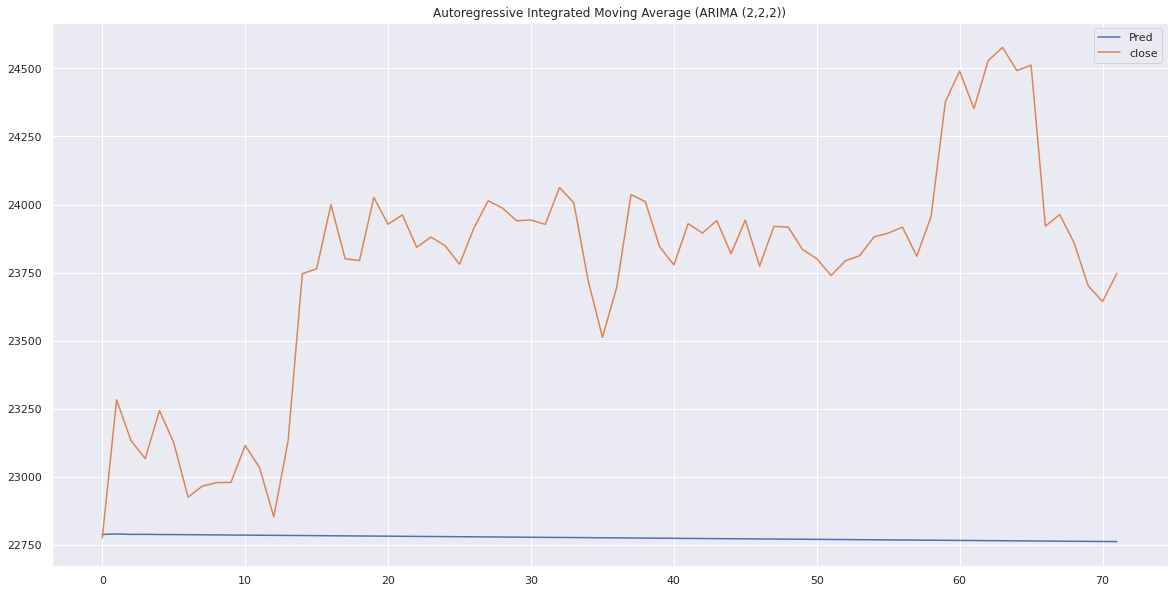

In [ ]:
from statsmodels.tsa.arima_model import ARIMA


def ARIMA_model(train,test):
    # fit model
    model = ARIMA(train['close'], order=(2, 2, 2))
    model_fit = model.fit(disp=False)
    # make prediction
    yhat = model_fit.predict(len(train), len(train) + len(test) - 1, typ='levels')
    res=pd.DataFrame({"Pred":yhat, "close":test["close"].values})
    return res

df_ret = ARIMA_model(df1_train, df_test)
show_graph(df1_train, df_ret, "Autoregressive Integrated Moving Average (ARIMA (2,2,2))")
show_graphp1( df_ret,  "Autoregressive Integrated Moving Average (ARIMA (2,2,2))")

## 5. Seasonal Autoregressive Integrated Moving-Average (SARIMA)
The Seasonal Autoregressive Integrated Moving Average (SARIMA) method models the next step in the sequence as a linear function of the differenced observations, errors, differenced seasonal observations, and seasonal errors at prior time steps.<br>

It combines the ARIMA model with the ability to perform the same autoregression, differencing, and moving average modeling at the seasonal level.<br>

The notation for the model involves specifying the order for the AR(p), I(d), and MA(q) models as parameters to an ARIMA function and AR(P), I(D), MA(Q) and m parameters at the seasonal level, e.g. SARIMA(p, d, q)(P, D, Q)m where “m” is the number of time steps in each season (the seasonal period). A SARIMA model can be used to develop AR, MA, ARMA and ARIMA models.<br>

The method is suitable for univariate time series with trend and/or seasonal components.<br>

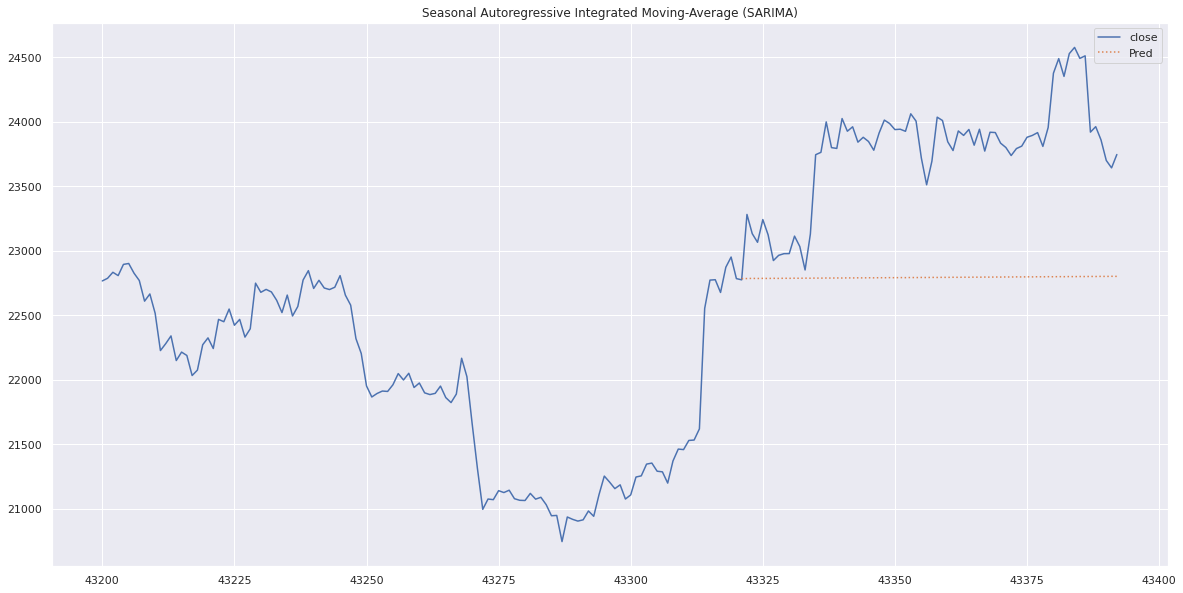


Evaluated model: Seasonal Autoregressive Integrated Moving-Average (SARIMA)
Mean absolute error: 971.5311080092326
Root mean squared error: 1054.0679575070344


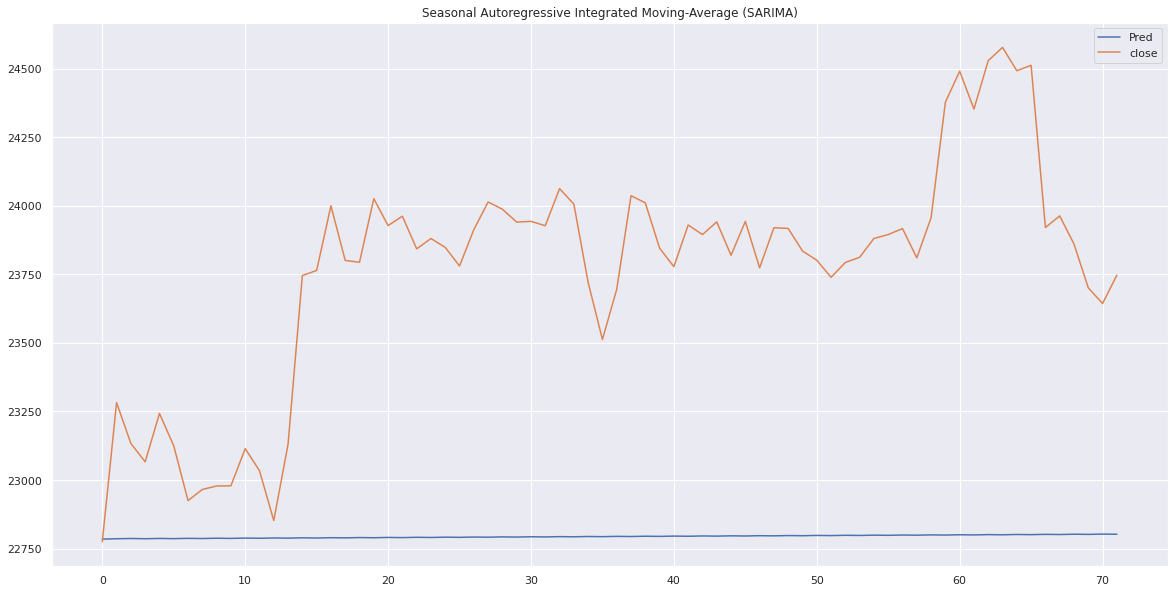

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

def SARIMA_model(train,test):
    # fit model
    model = SARIMAX(train['close'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 2))
    model_fit = model.fit(disp=False)
    # make prediction
    yhat = model_fit.predict(len(train), len(train) + len(test) - 1)
    res=pd.DataFrame({"Pred":yhat, "close":test["close"].values})
    return res

df_ret = SARIMA_model(df1_train, df_test)
show_graph(df1_train, df_ret, "Seasonal Autoregressive Integrated Moving-Average (SARIMA)")
show_graphp1( df_ret,  "Seasonal Autoregressive Integrated Moving-Average (SARIMA)")

## SARIMA (1, 1, 1) (2, 2, 1, 2)

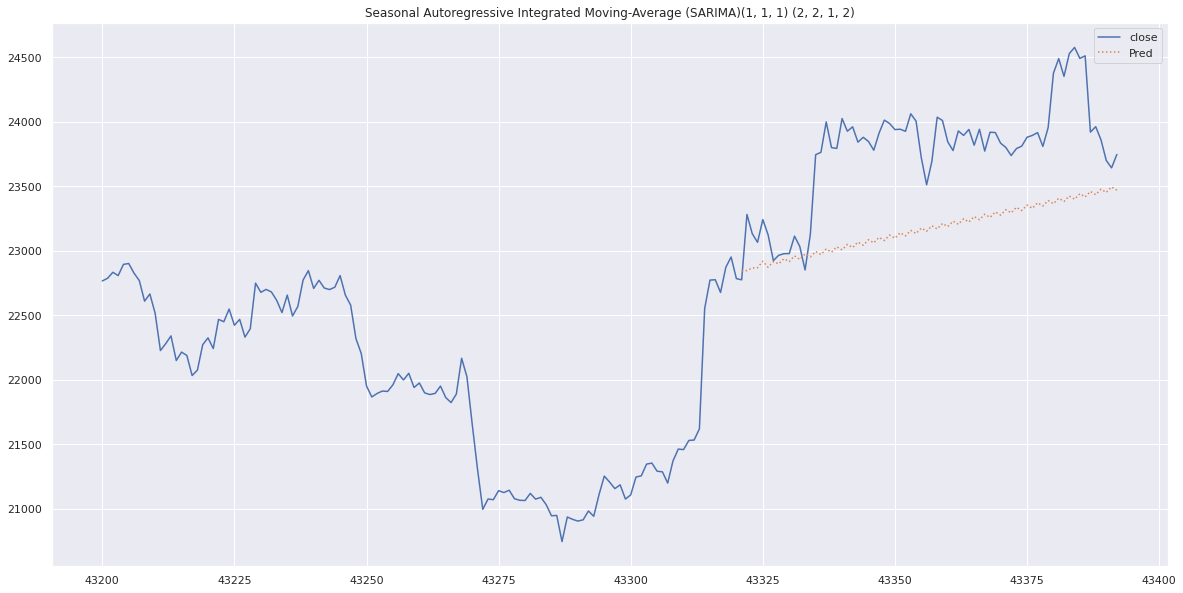


Evaluated model: Seasonal Autoregressive Integrated Moving-Average (SARIMA)(1, 1, 1) (2, 2, 1, 2)
Mean absolute error: 599.1510950852896
Root mean squared error: 671.3171998179702


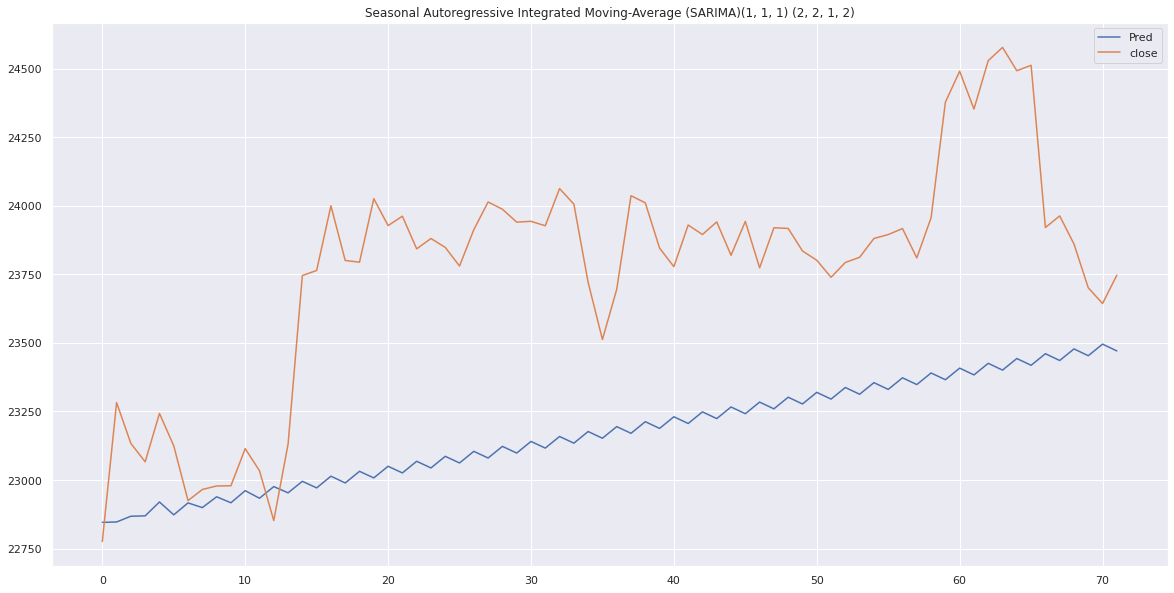

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

def SARIMA_model(train,test):
    # fit model
    model = SARIMAX(train['close'], order=(1, 1, 1), seasonal_order=(2, 2, 1, 2))
    model_fit = model.fit(disp=False)
    # make prediction
    yhat = model_fit.predict(len(train), len(train) + len(test) - 1)
    res=pd.DataFrame({"Pred":yhat, "close":test["close"].values})
    return res

df_ret = SARIMA_model(df1_train, df_test)
show_graph(df1_train, df_ret, "Seasonal Autoregressive Integrated Moving-Average (SARIMA)(1, 1, 1) (2, 2, 1, 2)")
show_graphp1( df_ret,  "Seasonal Autoregressive Integrated Moving-Average (SARIMA)(1, 1, 1) (2, 2, 1, 2)")

## 10. Simple Exponential Smoothing (SES)
The Simple Exponential Smoothing (SES) method models the next time step as an exponentially weighted linear function of observations at prior time steps.<br>

The method is suitable for univariate time series without trend and seasonal components.<br>

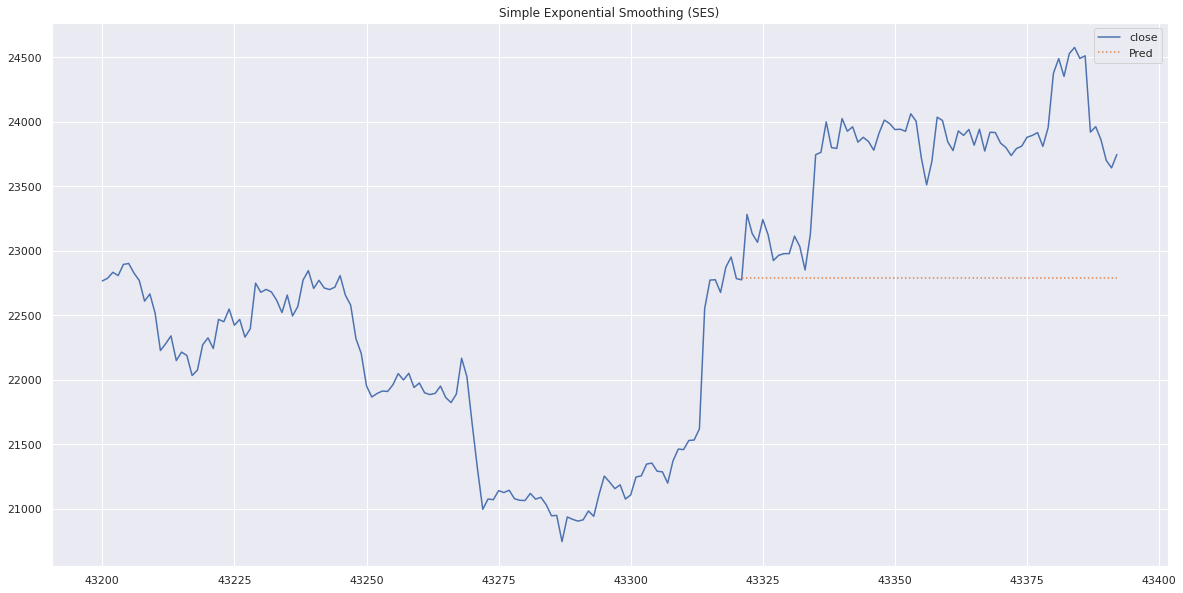


Evaluated model: Simple Exponential Smoothing (SES)
Mean absolute error: 979.6413133575479
Root mean squared error: 1062.860805289122


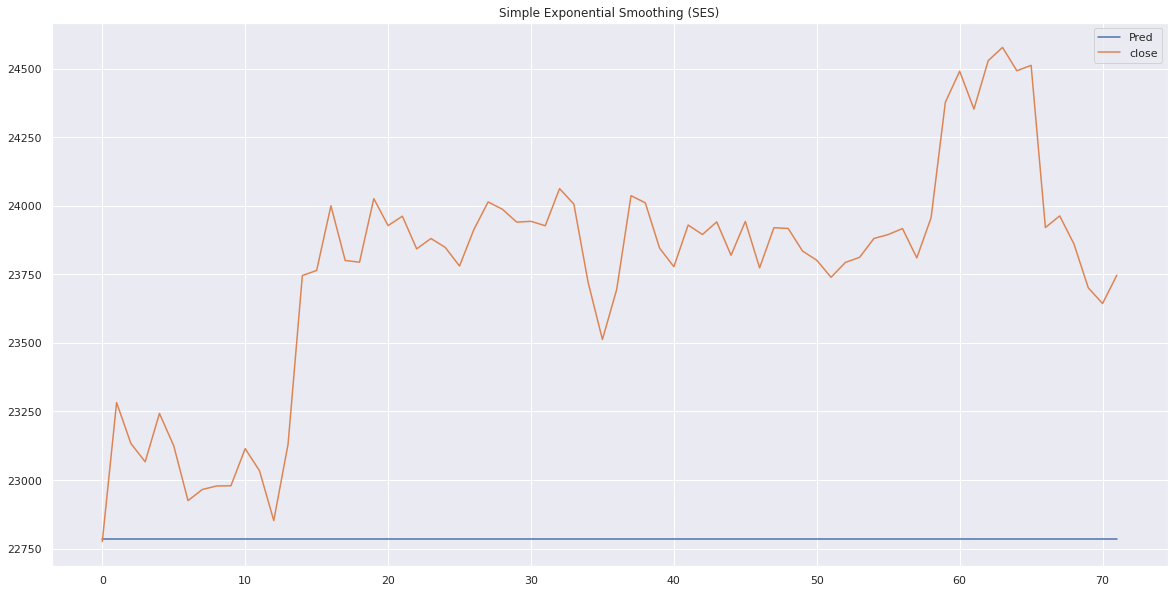

In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from random import random

def SES_model(train,test):
    # fit model
    model = SimpleExpSmoothing(train['close'])
    model_fit = model.fit()
    # make prediction
    yhat=model_fit.predict(len(train), len(train) + len(test) - 1)
    res=pd.DataFrame({"Pred":yhat, "close":test["close"].values})
    return res
 
df_ret = SES_model(df_train, df_test)
show_graph(df1_train, df_ret,"Simple Exponential Smoothing (SES)")
show_graphp1( df_ret,  "Simple Exponential Smoothing (SES)")

## 11. Holt Winter’s Exponential Smoothing (HWES)
The Holt Winter’s Exponential Smoothing (HWES) also called the Triple Exponential Smoothing method models the next time step as an exponentially weighted linear function of observations at prior time steps, taking trends and seasonality into account.<br>

The method is suitable for univariate time series with trend and/or seasonal components.<br>

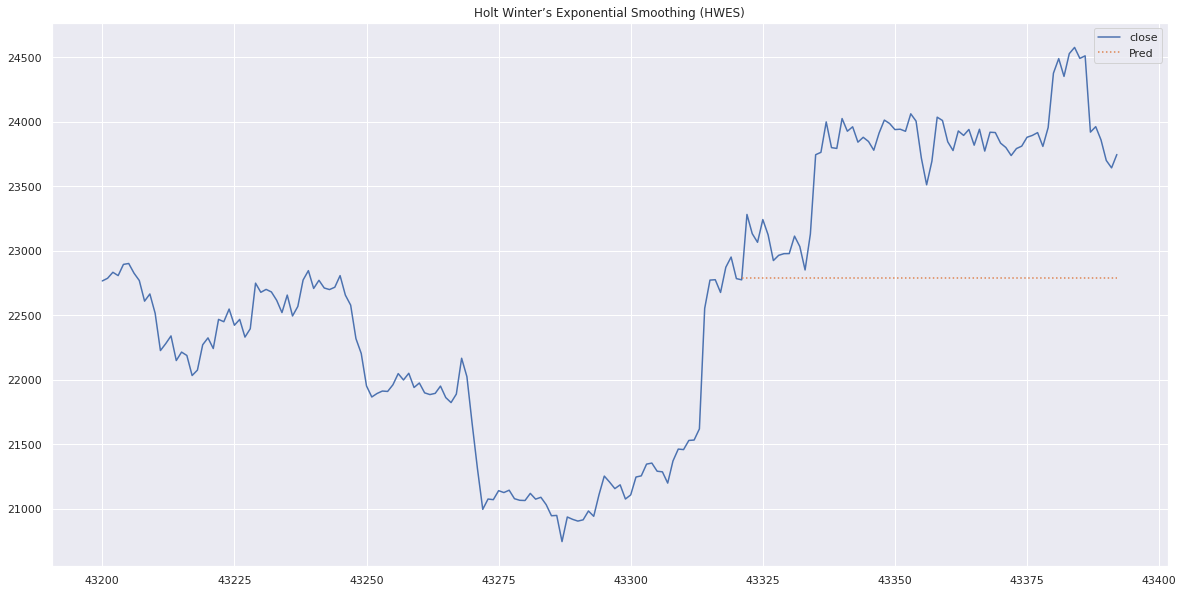


Evaluated model: Holt Winter’s Exponential Smoothing (HWES)
Mean absolute error: 979.6413133575479
Root mean squared error: 1062.860805289122


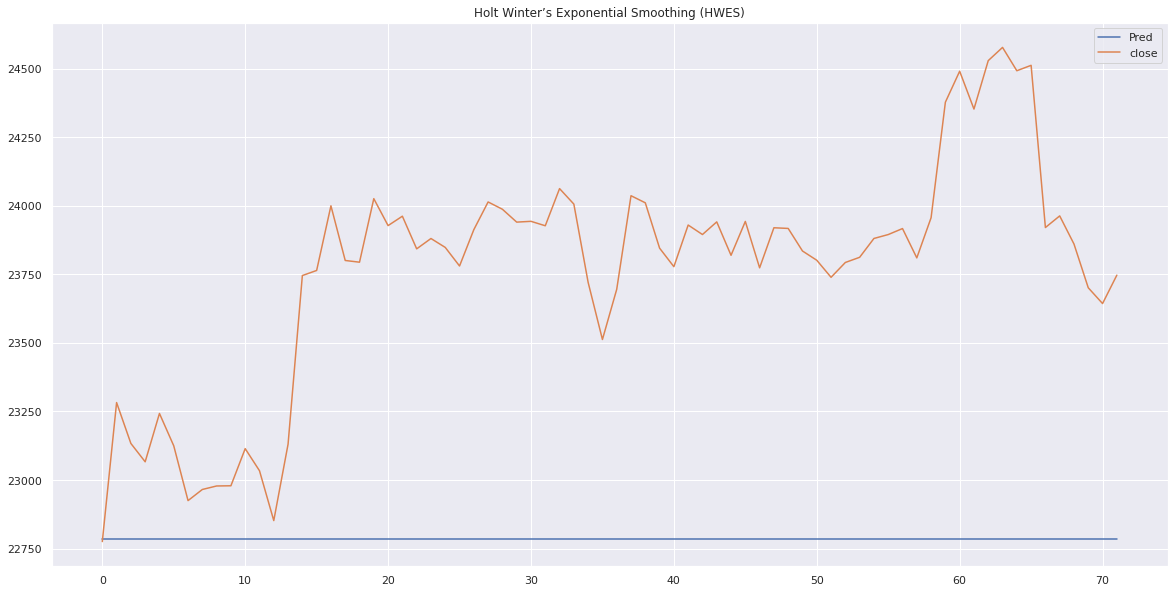

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from random import random

def HWES_model(train,test):
    # fit model
    model = ExponentialSmoothing(train['close'])
    model_fit = model.fit()
    # make prediction
    yhat=model_fit.predict(len(train), len(train) + len(test) - 1)
    res=pd.DataFrame({"Pred":yhat, "close":test["close"].values})
    return res
 

df_ret = HWES_model(df_train, df_test)
show_graph(df1_train, df_ret, "Holt Winter’s Exponential Smoothing (HWES)")
show_graphp1( df_ret,  "Holt Winter’s Exponential Smoothing (HWES)")

# Modelo AUTOARIMA hiperparametros optimizados

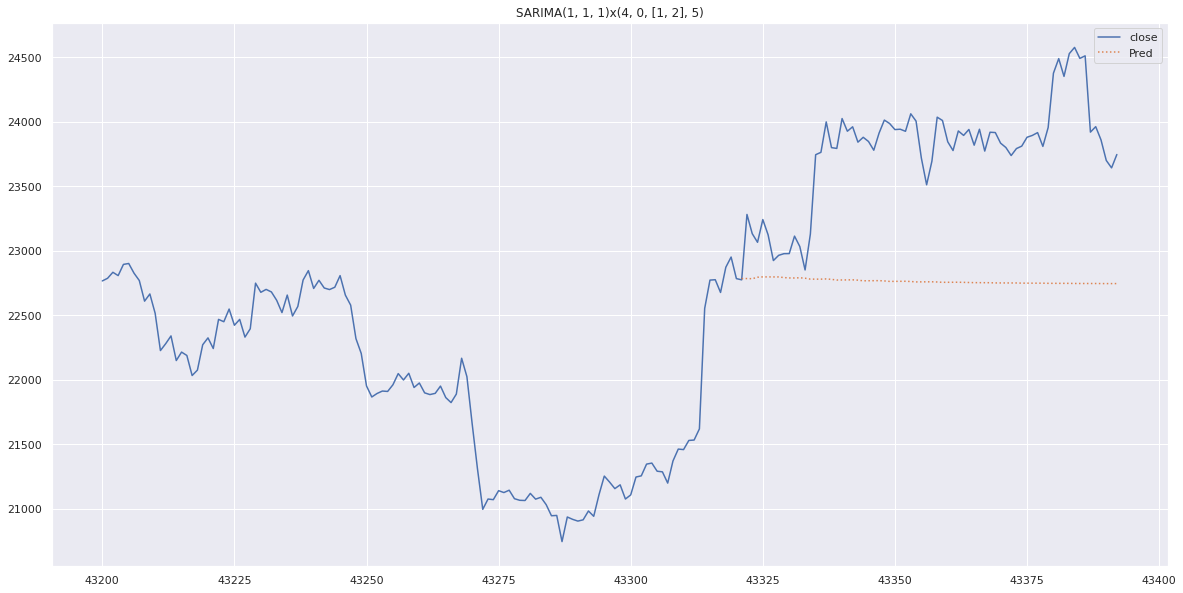


Evaluated model: SARIMA(1, 1, 1)x(4, 0, [1, 2], 5)
Mean absolute error: 1001.0091217474906
Root mean squared error: 1087.4638103222735


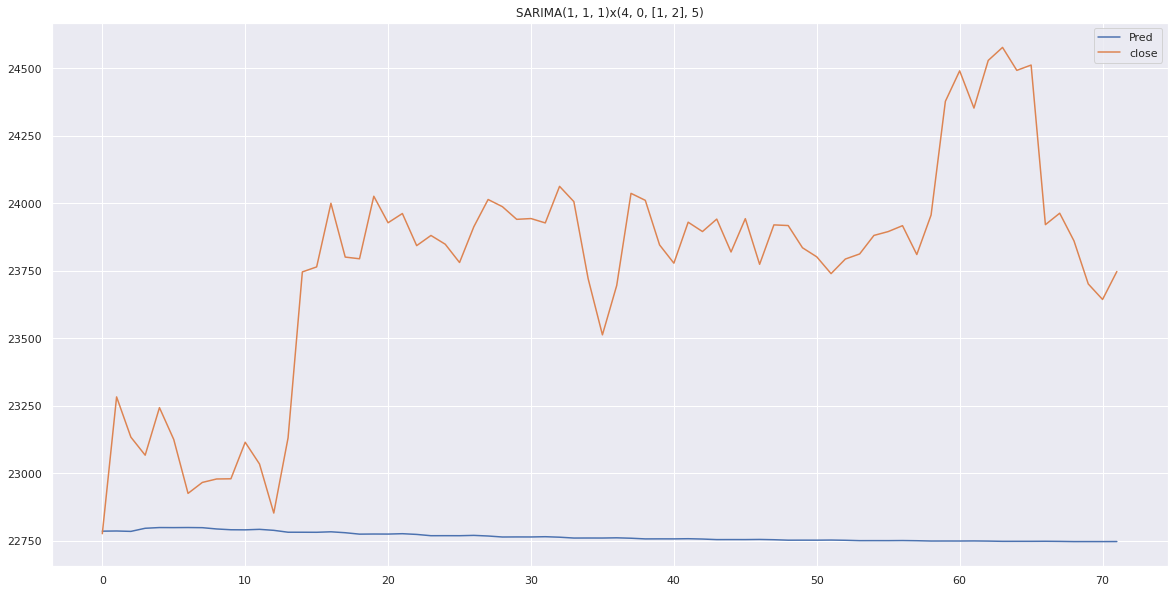

In [17]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

def SARIMA_model(train,test):
    # fit model
    model = SARIMAX(train['close'], order=(1, 1, 1), seasonal_order=((4, 0, [1, 2], 5)))
    model_fit = model.fit(disp=False)
    # make prediction
    yhat = model_fit.predict(len(train), len(train) + len(test) - 1)
    res=pd.DataFrame({"Pred":yhat, "close":test["close"].values})
    return res

df_ret = SARIMA_model(df1_train, df_test)
show_graph(df1_train, df_ret, "SARIMA(1, 1, 1)x(4, 0, [1, 2], 5)")
show_graphp1( df_ret,  "SARIMA(1, 1, 1)x(4, 0, [1, 2], 5)")